In [126]:
#https://heartbeat.fritz.ai/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
# Importing the training set
dataset_train = pd.read_csv('AAPL.csv')

In [108]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [109]:
dataset_train.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [110]:
def convert_dates(df, date_column, replace_index, time_zone='CET'):
    df[date_column] = pd.to_datetime(df[date_column], utc=True).dt.tz_convert(time_zone)
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    if replace_index == False:
        return df
    else:
        df.index = df[date_column]
        return df

In [111]:
dataset_train = convert_dates(dataset_train, "Date", True)

In [112]:
dataset_train.dtypes

Date         datetime64[ns, CET]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                   float64
dtype: object

In [113]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-09-21 02:00:00+02:00,2020-09-21 02:00:00+02:00,104.540001,110.190002,103.099998,110.080002,110.080002,195713800.0
2020-09-22 02:00:00+02:00,2020-09-22 02:00:00+02:00,112.680000,112.860001,109.160004,111.809998,111.809998,183055400.0
2020-09-23 02:00:00+02:00,2020-09-23 02:00:00+02:00,111.620003,112.110001,106.769997,107.120003,107.120003,150718700.0
2020-09-24 02:00:00+02:00,2020-09-24 02:00:00+02:00,105.169998,110.250000,105.000000,108.220001,108.220001,167743300.0
2020-09-25 02:00:00+02:00,2020-09-25 02:00:00+02:00,108.430000,112.440002,107.669998,112.279999,112.279999,149736300.0


In [114]:
train = dataset_train[dataset_train['Date'] < '2020-08-01']
test = dataset_train[dataset_train['Date'] >= '2020-08-01']

In [120]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1980-12-12 01:00:00+01:00,1980-12-12 01:00:00+01:00,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1980-12-15 01:00:00+01:00,1980-12-15 01:00:00+01:00,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
1980-12-16 01:00:00+01:00,1980-12-16 01:00:00+01:00,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
1980-12-17 01:00:00+01:00,1980-12-17 01:00:00+01:00,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
1980-12-18 01:00:00+01:00,1980-12-18 01:00:00+01:00,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [122]:
train.iloc[:, 1:2].values[0]

array([0.128348])

In [123]:
training_set = train.iloc[:, 1:2].values

In [124]:
training_set

array([[  0.128348],
       [  0.12221 ],
       [  0.113281],
       ...,
       [ 93.75    ],
       [ 94.1875  ],
       [102.885002]])

In [125]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [87]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [88]:
len(X_train)

1975

In [102]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [103]:
X_train

array([[[0.00076514],
        [0.00070545],
        [0.00061862],
        ...,
        [0.00064032],
        [0.00054808],
        [0.00049924]],

       [[0.00070545],
        [0.00061862],
        [0.00064032],
        ...,
        [0.00054808],
        [0.00049924],
        [0.00046668]],

       [[0.00061862],
        [0.00064032],
        [0.00067289],
        ...,
        [0.00049924],
        [0.00046668],
        [0.00049381]],

       ...,

       [[0.0033373 ],
        [0.00325048],
        [0.00318535],
        ...,
        [0.00307682],
        [0.00314195],
        [0.00307682]],

       [[0.00325048],
        [0.00318535],
        [0.00309854],
        ...,
        [0.00314195],
        [0.00307682],
        [0.00307682]],

       [[0.00318535],
        [0.00309854],
        [0.00303341],
        ...,
        [0.00307682],
        [0.00307682],
        [0.00303341]]])

In [90]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [91]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [99]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [101]:
y_train

array([0.00046668, 0.00049381, 0.00048838, ..., 0.00307682, 0.00303341,
       0.00301171])

In [93]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1975 samples
Epoch 1/100
1975/1975 [==============================] - 4s 2ms/sample - loss: nan
Epoch 2/100
1975/1975 [==============================] - 3s 2ms/sample - loss: nan
Epoch 3/100
1975/1975 [==============================] - 3s 2ms/sample - loss: nan
Epoch 4/100
1975/1975 [==============================] - 4s 2ms/sample - loss: nan
Epoch 5/100
1975/1975 [==============================] - 4s 2ms/sample - loss: nan
Epoch 6/100
1975/1975 [==============================] - 5s 2ms/sample - loss: nan
Epoch 7/100
1975/1975 [==============================] - 5s 3ms/sample - loss: nan
Epoch 8/100
1975/1975 [==============================] - 5s 3ms/sample - loss: nan
Epoch 9/100
1975/1975 [==============================] - 5s 3ms/sample - loss: nan
Epoch 10/100
1975/1975 [==============================] - 5s 3ms/sample - loss: nan
Epoch 11/100
1975/1975 [==============================] - 5s 3ms/sample - loss: nan
Epoch 12/100
1975/1975 [==============================] - 5s 3m

1975/1975 [==============================] - 4s 2ms/sample - loss: nan
Epoch 99/100
1975/1975 [==============================] - 4s 2ms/sample - loss: nan
Epoch 100/100
1975/1975 [==============================] - 4s 2ms/sample - loss: nan


In [94]:
real_stock_price = test.iloc[:, 1:2].values

In [95]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_train) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

W0928 01:42:55.571361 139694760052544 deprecation.py:323] From /home/caiquecoelho/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [97]:
predicted_stock_price

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

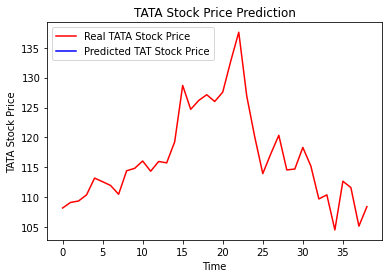

In [98]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()